# GRIP- Data Science and Business Analytics - Feb"2022
**Task 2- Prediction using unsupervised ML**

Aurthor: **Sania Agarwal**

We will be working on [Iris](https://bit.ly/3kXTdox) dataset .

**Problem Statement(s):**

Predict optimum number of clusters and represent visually.

In [58]:
#Importing libraries required for prediction
import pandas as pd                   #for data manipulation and analysis
from sklearn.cluster import KMeans    #for K-means clustering of data
import matplotlib.pyplot as plt       #for data visualisation
%matplotlib inline 
import seaborn as sns

import warnings as wg                 #to ingore warnings, if any, in the program
wg.filterwarnings("ignore")

# Importing and reading dataset

In [54]:
#Reading Data from csv file
data=pd.read_csv("iris.csv",index_col=0)
data.index.name=None
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [28]:
data["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [64]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Observation about IRIS Dataset**
1. There are 150 rows and 5 columns i.e there are 150 data points with each data point having 5 features.
2. Five columns are :
   a) SepalLengthCm
   b) SepalWidthCm
   c) PetalLengthCm
   d) PetalWidthCm
   e) Species
3. There are no null entries.
4. There are three kind of species which most of them being 'Iris-setosa'.

We will now drop the label (species) column from the dataset as it is unsupervised learning.

In [71]:
iris = pd.DataFrame(data)
iris_df = iris.drop(columns='Species' ) #Dropping column label 'Species' from the dataset


In [72]:
#Printing first five rows
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [73]:
# Printing last five rows
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3
150,5.9,3.0,5.1,1.8


# Visual representation of dataset

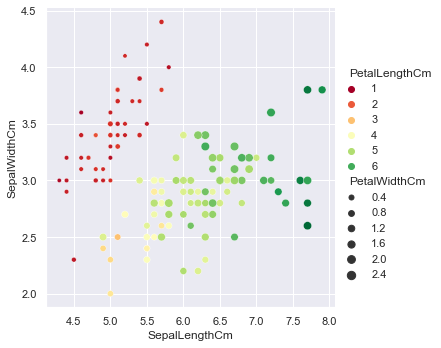

In [78]:
sns.set_theme()
sns.relplot(data=iris_df,x='SepalLengthCm',y='SepalWidthCm',hue='PetalLengthCm',palette='RdYlGn',size='PetalWidthCm')
plt.show()

From the above visualization, we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer.

# Finding optimal number of Clusters

To find optimum number of clusters, we use the **Elbow Method**.

The Elbow method runs K-means clustering on a dataset for a range of values and then for each value of k, computes
an average score.
The Elbow Method is the most popular method to determine the optimal number of clusters into which the data may be clustered!
For each value, within-cluster sum of squares value is computed and stored in some list.
These values are then plotted against the number of clusters used before.
The location of bend in the graph indicates the optimal number of clusters./

In [79]:
cluster_sse = []                       
cluster_range = range(1,8)                          #Specifying the range of clusters

for k in cluster_range:                             
    km = KMeans(n_clusters=k)                 #Here we are using k-means clustering algorithm to find k number of 
    km = km.fit(iris_df)                      #centroid(minimum) and then plot set of data around them as nearest 
    cluster_sse.append(km.inertia_)           #as possible using sum of squares method.

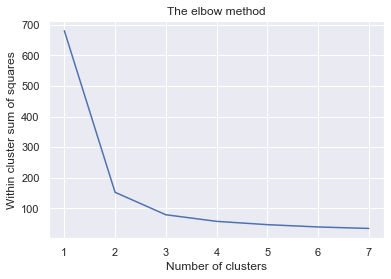

In [84]:
plt.plot(cluster_range,cluster_sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

From this we can choose the number of clusters as **3**.

# Applying K-Clustering on dataset

In [92]:
model  = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0) 
#Number of clusters to form is 3
#max_iter represents the maximum number of iterations for the k-means algorithm, n_init is the no of times the K-Means algorithm
#will be run with different centroid seeds
pred = model.fit_predict(iris_df) 

In [98]:
iris_df["Cluster"]=pred #Addind new column name 'Cluster' in iris_df
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [90]:
#As there are 3 cluster 0, 1 ,2 hence we can divide dataframe in three parts each contatinig datapoints for particular Cluster
df1=iris_df[iris_df['Cluster']==0] 
df2=iris_df[iris_df['Cluster']==1]
df3=iris_df[iris_df['Cluster']==2]

In [106]:
#Getting coordinates of centroid 
model.cluster_centers_

array([[ 5.00600000e+00,  3.41800000e+00,  1.46400000e+00,
         2.44000000e-01,  1.00000000e+00],
       [ 5.90161290e+00,  2.74838710e+00,  4.39354839e+00,
         1.43387097e+00, -1.22124533e-15],
       [ 6.85000000e+00,  3.07368421e+00,  5.74210526e+00,
         2.07105263e+00,  2.00000000e+00]])

# Visually representing cluster

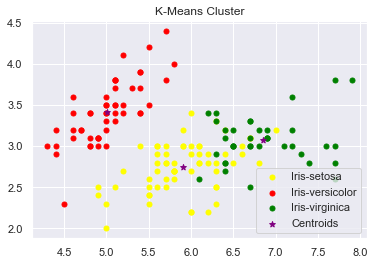

In [111]:
plt.scatter(df1.iloc[:,0], df1.iloc[:,1], s = 25, c = 'Yellow', label = 'Iris-setosa')#Scatter diagram for Iris-setosa species
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], s = 25, c = 'Red', label = 'Iris-versicolor') #Scatter diagram for Iris-versicolor species
plt.scatter(df3.iloc[:,0], df3.iloc[:,1], s = 25, c = 'Green', label = 'Iris-virginica')#Scatter diagram for Iris-virginica species
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],color = 'Purple',marker='*', label = 'Centroids')
plt.title('K-Means Cluster')      
plt.legend()                      
plt.show()

Hence with this, we have predicted the optimal number of clusters and represented it visually using K-Mean Clustering Algorithm .